In [67]:
import os
from dataclasses import dataclass
from typing import List

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [33]:
%matplotlib inline
DATA_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))


NUM_QUESTIONS = 10000
NUM_PLAYERS = 100

In [14]:
with open(f'{DATA_DIR}/E_in.txt', 'r') as f:
    T = int(f.readline())
    P = int(f.readline())
    
    answers = []
    
    for i in range(NUM_PLAYERS):
        answers.append(f.readline())

In [15]:
len(answers)

100

In [27]:
answer_matrix = np.row_stack([[int(x) for x in answer[:NUM_QUESTIONS]] for answer in answers])

In [28]:
answer_matrix.shape

(100, 10000)

In [58]:
difficulties = 1.0 - (np.array([np.mean(answer_matrix[:, i]) for i in range(NUM_QUESTIONS)]))

(array([ 543., 1428., 1144., 1062., 1031.,  985., 1041., 1128., 1174.,
         464.]),
 array([0.03 , 0.121, 0.212, 0.303, 0.394, 0.485, 0.576, 0.667, 0.758,
        0.849, 0.94 ]),
 <BarContainer object of 10 artists>)

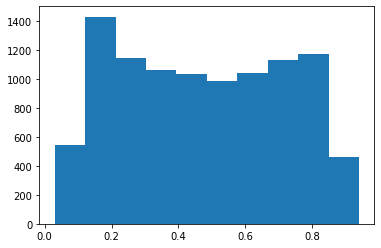

In [59]:
plt.hist(difficulties)

In [60]:
answer_matrix[0]

array([0, 0, 1, ..., 1, 1, 0])

In [61]:
len(difficulties[answer_matrix[0] == 1])

2744

In [62]:
np.mean(difficulties[answer_matrix[0] == 1])

0.261268221574344

In [84]:
@dataclass
class PlayerStats:
    num_correct: int
    mean_correct_difficulty: float
    std_dev_correct_difficulties: float
    correct_difficulties: List[float]
    incorrect_difficulties: List[float]
    

In [85]:
def get_player_stats(player_idx: int, ):
    return PlayerStats(num_correct=len(difficulties[answer_matrix[player_idx] == 1]),
                       mean_correct_difficulty=np.mean(difficulties[answer_matrix[player_idx] == 1]),
                       std_dev_correct_difficulties=np.std(difficulties[answer_matrix[player_idx] == 1]),
                       correct_difficulties=difficulties[answer_matrix[player_idx] == 1],
                       incorrect_difficulties=difficulties[answer_matrix[player_idx] == 0])

In [86]:
stats = [get_player_stats(i) for i in range(NUM_PLAYERS)]

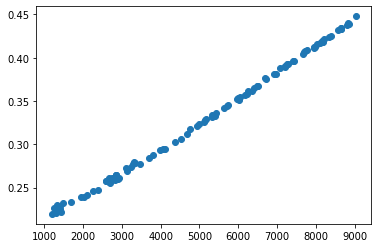

In [87]:
plt.scatter([s.num_correct for s in stats], [s.mean_correct_difficulty for s in stats])

(array([ 541., 1421., 1016., 1055.,  987.,  890., 1038.,  805.,  886.,
         394.]),
 array([0.03, 0.12, 0.21, 0.3 , 0.39, 0.48, 0.57, 0.66, 0.75, 0.84, 0.93]),
 <BarContainer object of 10 artists>)

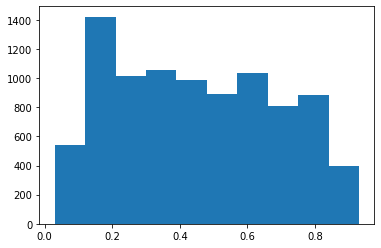

In [81]:
plt.hist(stats[58].correct_difficulties)

(array([  7.,   3.,  16.,  27.,  56.,  92., 119., 207., 306., 134.]),
 array([0.09 , 0.175, 0.26 , 0.345, 0.43 , 0.515, 0.6  , 0.685, 0.77 ,
        0.855, 0.94 ]),
 <BarContainer object of 10 artists>)

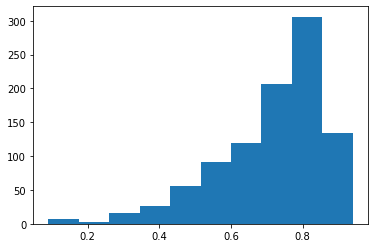

In [80]:
plt.hist(stats[58].incorrect_difficulties)

(array([315., 968., 599., 334., 231., 118.,  89.,  47.,  27.,  16.]),
 array([0.03 , 0.117, 0.204, 0.291, 0.378, 0.465, 0.552, 0.639, 0.726,
        0.813, 0.9  ]),
 <BarContainer object of 10 artists>)

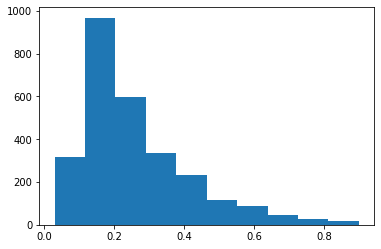

In [82]:
plt.hist(stats[0].correct_difficulties)

(array([ 250.,  527.,  638.,  650.,  865.,  886.,  880., 1071., 1130.,
         359.]),
 array([0.07 , 0.157, 0.244, 0.331, 0.418, 0.505, 0.592, 0.679, 0.766,
        0.853, 0.94 ]),
 <BarContainer object of 10 artists>)

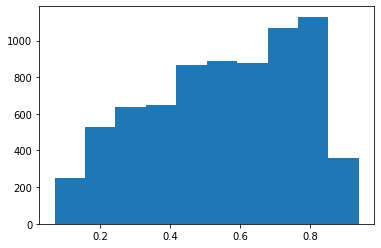

In [83]:
plt.hist(stats[0].incorrect_difficulties)

In [88]:
stats[58].std_dev_correct_difficulties

0.23253599589714813

In [89]:
stats[0].std_dev_correct_difficulties

0.15468460645486568

In [90]:
np.std(difficulties)

0.23894228088808395

In [91]:
np.mean([x.std_dev_correct_difficulties for x in stats])

0.18508427301196217

### Hypothesis

1. The cheater will have a bimodal correct answer difficulty distribution.

In [218]:
def plot_random_player():
    idx = np.random.randint(NUM_PLAYERS)
    plt.hist(stats[idx].correct_difficulties, bins=100)
    print(idx)
    plt.show()

41


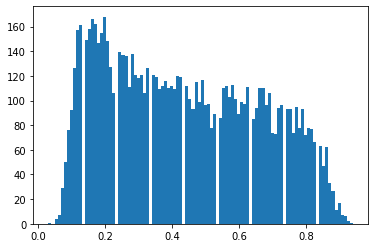

In [219]:
plot_random_player()

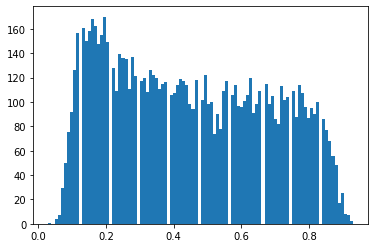

In [220]:
plt.hist(stats[58].correct_difficulties, bins=100)
plt.show()

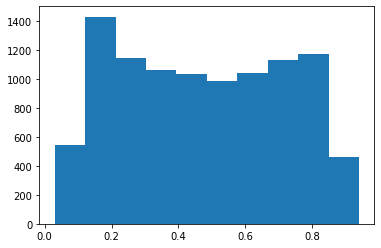

In [221]:
plt.hist(difficulties)
plt.show()

In [200]:
suspects = [13, 58, 16, 64, 82std_dev_correct_difficulties]

In [217]:
stats[58]

PlayerStats(num_correct=9033, mean_correct_difficulty=0.44790656481789, std_dev_correct_difficulties=0.23253599589714813, correct_difficulties=array([0.19, 0.11, 0.23, ..., 0.19, 0.23, 0.45]), incorrect_difficulties=array([0.77, 0.86, 0.45, 0.81, 0.73, 0.84, 0.65, 0.81, 0.83, 0.75, 0.69,
       0.61, 0.38, 0.52, 0.86, 0.59, 0.85, 0.84, 0.73, 0.83, 0.69, 0.62,
       0.48, 0.71, 0.43, 0.61, 0.72, 0.87, 0.85, 0.38, 0.88, 0.51, 0.74,
       0.69, 0.55, 0.66, 0.76, 0.88, 0.74, 0.4 , 0.67, 0.57, 0.85, 0.61,
       0.83, 0.71, 0.78, 0.82, 0.75, 0.58, 0.88, 0.77, 0.72, 0.8 , 0.51,
       0.8 , 0.42, 0.75, 0.88, 0.85, 0.51, 0.49, 0.76, 0.75, 0.36, 0.62,
       0.68, 0.77, 0.9 , 0.78, 0.83, 0.8 , 0.63, 0.74, 0.52, 0.81, 0.2 ,
       0.76, 0.79, 0.6 , 0.74, 0.66, 0.39, 0.91, 0.39, 0.91, 0.76, 0.9 ,
       0.58, 0.71, 0.53, 0.82, 0.54, 0.41, 0.3 , 0.85, 0.7 , 0.84, 0.88,
       0.4 , 0.87, 0.83, 0.72, 0.76, 0.78, 0.77, 0.59, 0.76, 0.77, 0.88,
       0.56, 0.64, 0.62, 0.29, 0.7 , 0.64, 0.86, 0.83,

In [216]:
max(stats, key=lambda x: x.std_dev_correct_difficulties)

PlayerStats(num_correct=9033, mean_correct_difficulty=0.44790656481789, std_dev_correct_difficulties=0.23253599589714813, correct_difficulties=array([0.19, 0.11, 0.23, ..., 0.19, 0.23, 0.45]), incorrect_difficulties=array([0.77, 0.86, 0.45, 0.81, 0.73, 0.84, 0.65, 0.81, 0.83, 0.75, 0.69,
       0.61, 0.38, 0.52, 0.86, 0.59, 0.85, 0.84, 0.73, 0.83, 0.69, 0.62,
       0.48, 0.71, 0.43, 0.61, 0.72, 0.87, 0.85, 0.38, 0.88, 0.51, 0.74,
       0.69, 0.55, 0.66, 0.76, 0.88, 0.74, 0.4 , 0.67, 0.57, 0.85, 0.61,
       0.83, 0.71, 0.78, 0.82, 0.75, 0.58, 0.88, 0.77, 0.72, 0.8 , 0.51,
       0.8 , 0.42, 0.75, 0.88, 0.85, 0.51, 0.49, 0.76, 0.75, 0.36, 0.62,
       0.68, 0.77, 0.9 , 0.78, 0.83, 0.8 , 0.63, 0.74, 0.52, 0.81, 0.2 ,
       0.76, 0.79, 0.6 , 0.74, 0.66, 0.39, 0.91, 0.39, 0.91, 0.76, 0.9 ,
       0.58, 0.71, 0.53, 0.82, 0.54, 0.41, 0.3 , 0.85, 0.7 , 0.84, 0.88,
       0.4 , 0.87, 0.83, 0.72, 0.76, 0.78, 0.77, 0.59, 0.76, 0.77, 0.88,
       0.56, 0.64, 0.62, 0.29, 0.7 , 0.64, 0.86, 0.83,